In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to (or create) the database file
conn = sqlite3.connect("sales_data.db")

# Create a cursor
cursor = conn.cursor()

# Create a simple sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ('Laptop', 5, 800),
    ('Laptop', 3, 800),
    ('Phone', 10, 300),
    ('Phone', 7, 300),
    ('Tablet', 4, 400),
    ('Tablet', 2, 400)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Commit changes
conn.commit()


In [3]:
# Write a SQL query to summarize total quantity and total revenue per product
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Run the query and load results into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the summary
print(df)


  product  total_quantity  revenue
0  Laptop               8   6400.0
1   Phone              17   5100.0
2  Tablet               6   2400.0


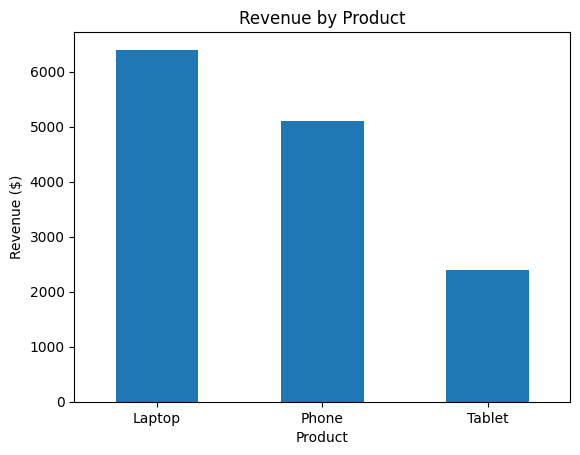

In [4]:
# Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.xticks(rotation=0)
plt.show()


In [5]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>

In [6]:
from google.colab import files
files.download("sales_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>